In [ ]:
df = pd.read_csv("/content/iris.csv")
print(df.columns)
#print(df['variety'])

**VISUALIZATION**

<Axes: title={'center': 'sepal.width'}, xlabel='[variety]', ylabel='sepal.width'>

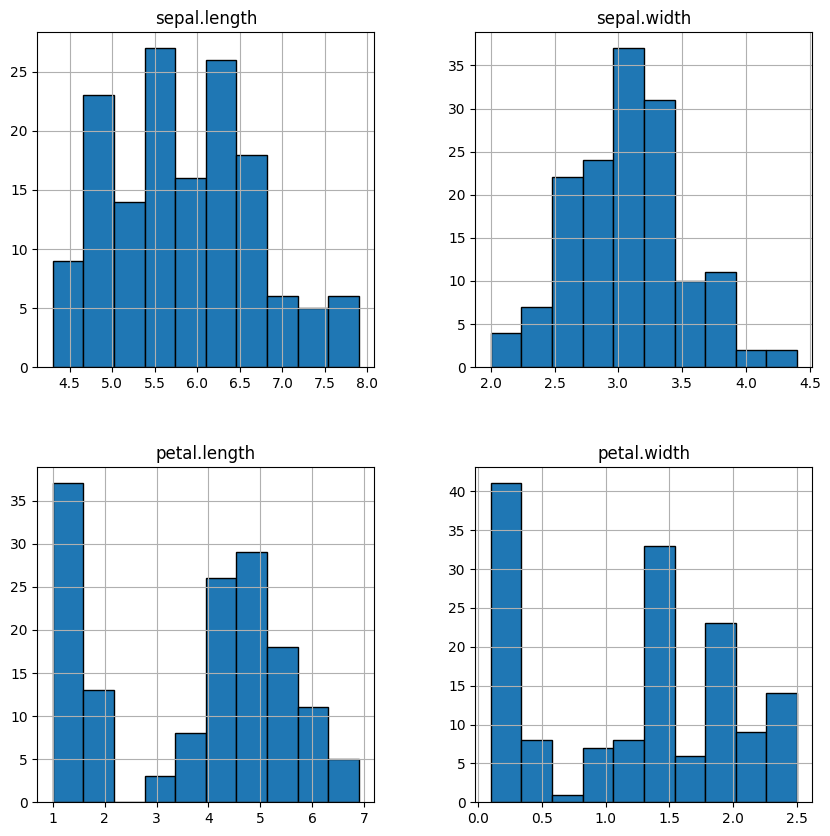

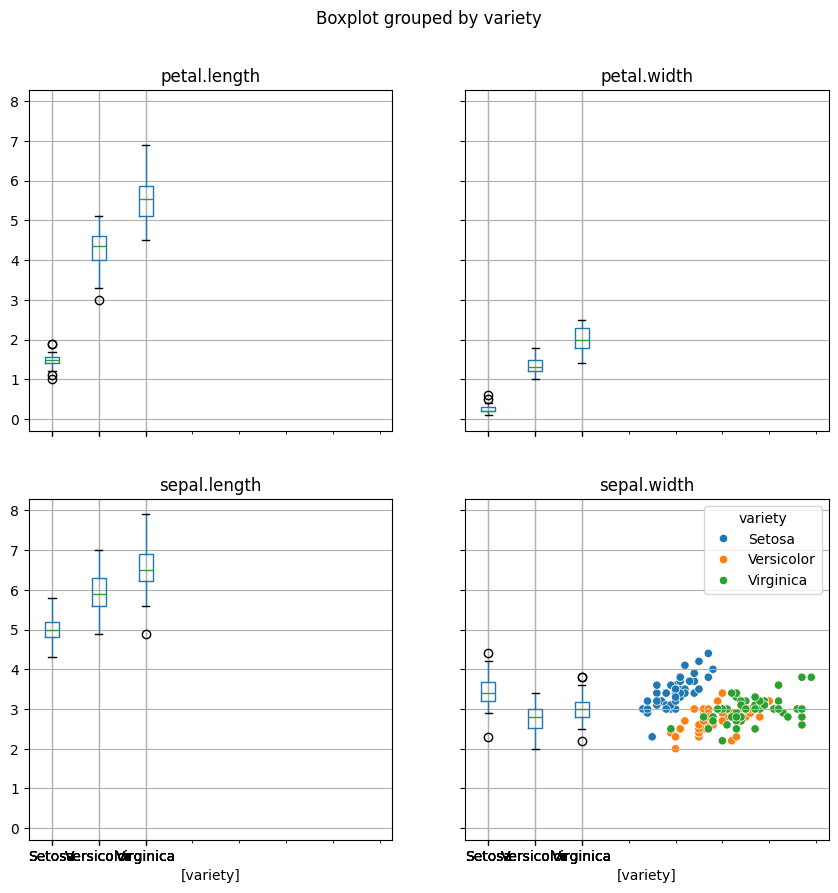

In [ ]:
#histogram
df.hist(edgecolor = 'black',figsize = (10,10))

#Box plot
df.boxplot(by = 'variety',figsize=(10,10))



<Axes: xlabel='sepal.length', ylabel='sepal.width'>

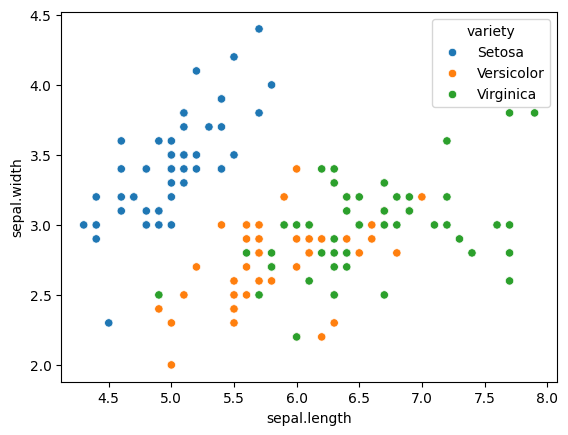

In [ ]:
#scatter plot
import seaborn as sns
print()
sns.scatterplot(x = 'sepal.length', y = 'sepal.width', data = df, hue = 'variety')

**MODELS BUILDING**

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
1.0
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



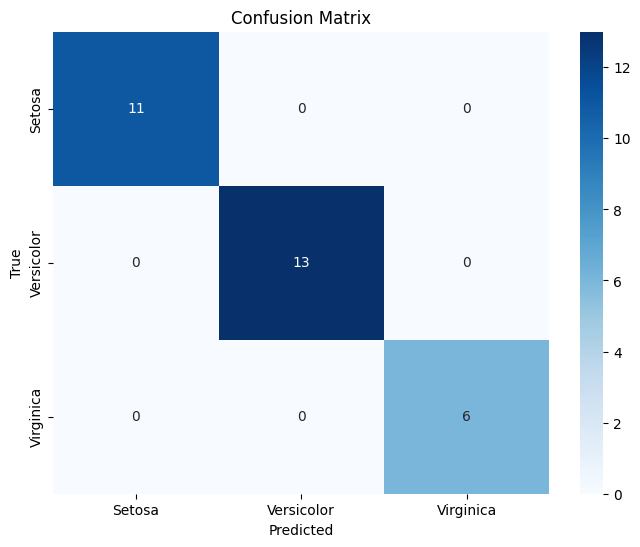

['Virginica']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


x = df.drop("variety",axis=1)
y = df['variety']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=1)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

#accuracy
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

#confusion metrix
comf_met = confusion_matrix(y_test, y_pred, labels = ['Setosa', 'Versicolor', 'Virginica'])
plt.figure(figsize=(8,6))
sns.heatmap(comf_met, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


input = pd.DataFrame([[6.5,2.7,5.1,1.6]], columns=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
pred = knn_model.predict(input)
print(pred)



In [ ]:
from os import XATTR_CREATE
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
pred = nb_model.predict(input)
print(pred)

['Virginica']


['Versicolor']


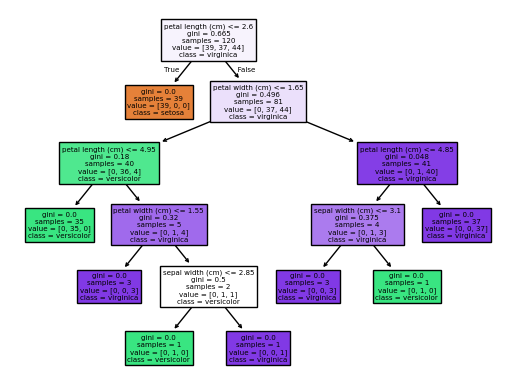

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
pred = dt_model.predict(input)
print(pred)

fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(dt_model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)
pred = svm_model.predict(input)
print(pred)


['Virginica']


In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read and prepare the data
data = pd.read_csv('/content/iris.csv')
X = data.drop('variety', axis=1)
y_true = data['variety']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
y_pred_nums = kmeans.fit_predict(X_scaled)

# Map cluster numbers to variety names
'''cluster_to_variety = {}
for cluster in range(n_clusters):
    mask = (y_pred_nums == cluster)
    true_labels = y_true[mask]
    most_common = true_labels.mode()[0]
    cluster_to_variety[cluster] = most_common'''

#predicting output for the values
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
new_data_scaled = scaler.transform(new_data)
cluster = kmeans.predict(new_data_scaled)[0]
print(f"Cluster for the new data: {cluster}")
predicted_variety = cluster_to_variety[cluster]
print(f"Predicted Iris Variety: {predicted_variety}")



Cluster for the new data: 1
Predicted Iris Variety: Setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
